In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Importing Packages**

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.io as pio

## Dataset Link :
https://www.kaggle.com/datasets/mayankanand2701/rohit-sharma-international-centuries

In [68]:
df=pd.read_csv("Datasest/Rohit_Sharma_Centuries.csv")
df.head()

,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result
0,1,28-05-2010,114,95.79,ODI,4,1,Yes,No,No,Zimbabwe,"Queens Sports Club, Bulawayo",Away,Lost
1,2,30-05-2010,101,170.00,ODI,4,2,No,Yes,No,Sri Lanka,"Queens Sports Club, Bulawayo",Neutral,Won
2,3,16-10-2013,141,114.63,ODI,1,2,No,Yes,No,Australia,"Sawai Mansingh Stadium, Jaipur",Home,Won
3,4,02-11-2013,209,132.27,ODI,1,1,Yes,Yes,No,Australia,"M. Chinnaswamy Stadium, Bangalore",Home,Won
4,5,13-11-2014,264,152.60,ODI,2,1,Yes,Yes,No,Sri Lanka,"Eden Gardens, Kolkata",Home,Won


# Data Exploration

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S.No.             48 non-null     int64  
 1   Date              48 non-null     object 
 2   Score             48 non-null     int64  
 3   Strike Rate       48 non-null     float64
 4   Type of Match     48 non-null     object 
 5   Position          48 non-null     int64  
 6   Innings           48 non-null     int64  
 7   Dismissed         48 non-null     object 
 8   Man of the Match  48 non-null     object 
 9   Captain           48 non-null     object 
 10  Against           48 non-null     object 
 11  Venue             48 non-null     object 
 12  H/A/N             48 non-null     object 
 13  Result            48 non-null     object 
dtypes: float64(1), int64(4), object(9)
memory usage: 5.4+ KB


In [70]:
df.describe()

,S.No.,Score,Strike Rate,Position,Innings
count,48.00,48.000000,48.000000,48.000000,48.000000
mean,24.50,134.937500,109.656042,1.708333,1.541667
std,14.00,34.744298,41.704401,1.320192,0.581939
min,1.00,100.000000,50.560000,1.000000,1.000000
25%,12.75,111.000000,85.197500,1.000000,1.000000
50%,24.50,124.500000,105.710000,1.000000,1.500000
75%,36.25,147.750000,121.100000,2.000000,2.000000
max,48.00,264.000000,274.410000,6.000000,3.000000


In [71]:
df.describe(include='object')

,Date,Type of Match,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result
count,48,48,48,48,48,48,48,48,48
unique,47,3,2,2,2,10,35,3,3
top,02-10-2019,ODI,Yes,Yes,No,Australia,"M. Chinnaswamy Stadium, Bangalore",Home,Won
freq,2,31,33,28,37,9,3,27,39


# **Data Cleaning**

In [72]:
df = df.drop(['S.No.', 'Date'], axis='columns')
df.sample(5)

,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result
26,103,109.57,ODI,2,2,Yes,Yes,No,Sri Lanka,"Headingley Cricket Ground, Leeds",Neutral,Won
36,212,83.13,Test,2,1,Yes,Yes,No,South Africa,"JSCA International Stadium Complex, Ranchi",Home,Won
28,119,92.96,ODI,1,2,Yes,Yes,No,Australia,"M. Chinnaswamy Stadium, Bangalore",Home,Won
3,209,132.27,ODI,1,1,Yes,Yes,No,Australia,"M. Chinnaswamy Stadium, Bangalore",Home,Won
25,104,113.04,ODI,2,1,Yes,Yes,No,Bangladesh,"Edgbaston Cricket Ground, Birmingham",Neutral,Won


In [73]:
df.isna().sum()

Score               0
Strike Rate         0
Type of Match       0
Position            0
Innings             0
Dismissed           0
Man of the Match    0
Captain             0
Against             0
Venue               0
H/A/N               0
Result              0
dtype: int64

**Adding Relevant Column**

In [74]:
Balls_Faced = df['Score'] / df['Strike Rate'] * 100
Balls_Faced=Balls_Faced.astype(int)
df['Balls_Faced'] = Balls_Faced
df['Balls_Faced'].head()

0    119
1     59
2    123
3    158
4    173
Name: Balls_Faced, dtype: int32

**Slight Correction In 'Result' Column**

In [75]:
df['Result'].unique()

array(['Lost', 'Won', 'Won '], dtype=object)

In [76]:
df['Result']= df['Result'].str.replace('Won ','Won')
df['Result'].unique()

array(['Lost', 'Won'], dtype=object)

# Data Visualization

# Strike Rate Range

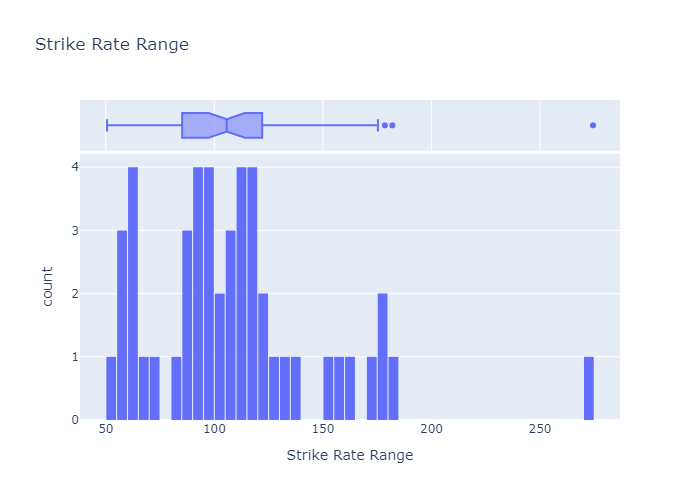

In [77]:

fig = px.histogram(x=df['Strike Rate'],nbins=47,marginal='box',labels={ 'count':'Frequency Of Strike Rate','x':'Strike Rate Range'
}, title = "Strike Rate Range")

fig.update_layout(bargap=0.1)
#fig.show()

#Save the figure as static image to be able to render in github code block
fig.write_image("scatter_plot.png")

#Display the figure inline in the notebook as static image
from IPython.display import Image, display
Image("scatter_plot.png")

In [78]:
df['Strike Rate'].describe()

count     48.000000
mean     109.656042
std       41.704401
min       50.560000
25%       85.197500
50%      105.710000
75%      121.100000
max      274.410000
Name: Strike Rate, dtype: float64

# Runs Scored Against Oppositions

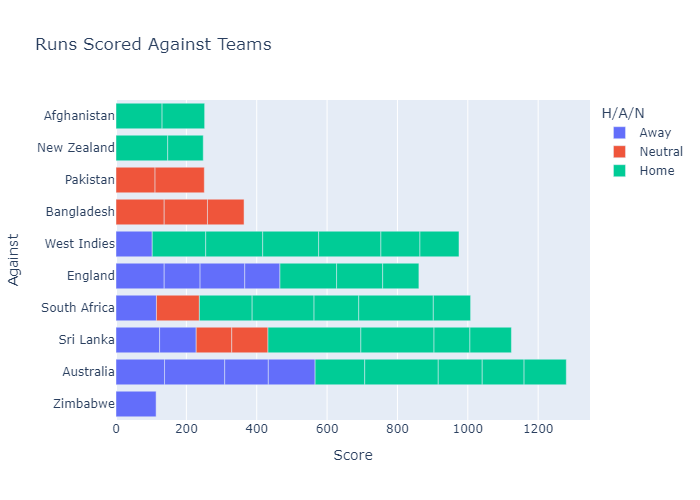

In [79]:
fig1 = px.bar(df,x='Score',y='Against',color=df['H/A/N'],title='Runs Scored Against Teams')
#fig.show()
#Save the figure as static image to be able to render in github code block
fig1.write_image("scatter_plot1.png")

#Display the figure inline in the notebook as static image
Image("scatter_plot1.png")

# Centuries In Different Format Of Games

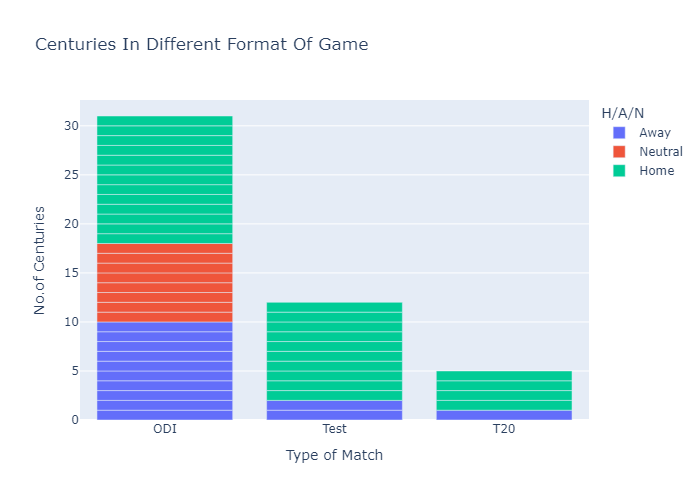

In [80]:
fig2 = px.bar(df,x='Type of Match',color=df['H/A/N'],labels={"count": "No.of Centuries"} , title = "Centuries In Different Format Of Game")
#fig.show()

#Save the figure as static image to be able to render in github code block
fig2.write_image("scatter_plot2.png")

#Display the figure inline in the notebook as static image
Image("scatter_plot2.png")

# Runs Against Balls Faced

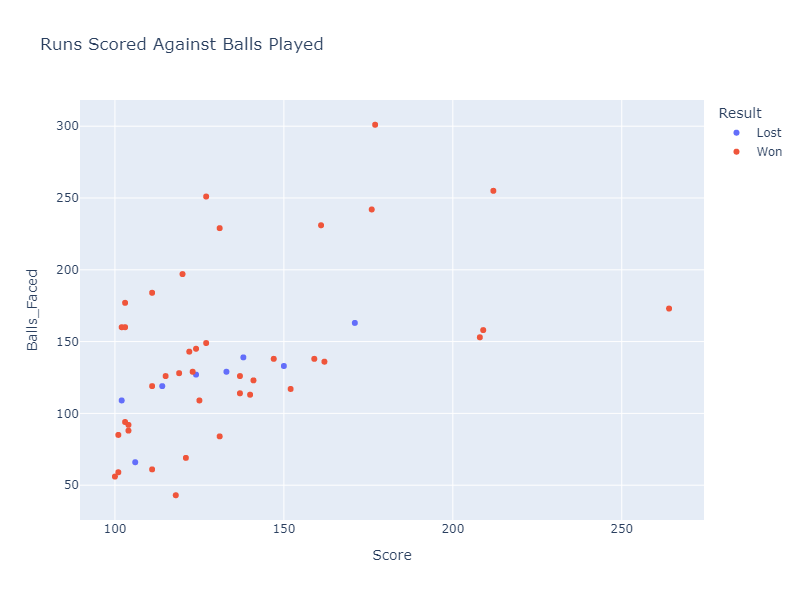

In [81]:
fig3 = px.scatter(df,x=df['Score'],y=df['Balls_Faced'] , color=df['Result'],width=800,height=600,title = 'Runs Scored Against Balls Played')
#fig.show()

#Save the figure as static image to be able to render in github code block
fig3.write_image("scatter_plot3.png")

#Display the figure inline in the notebook as static image
Image("scatter_plot3.png")

# Strike Rate Against Balls Faced

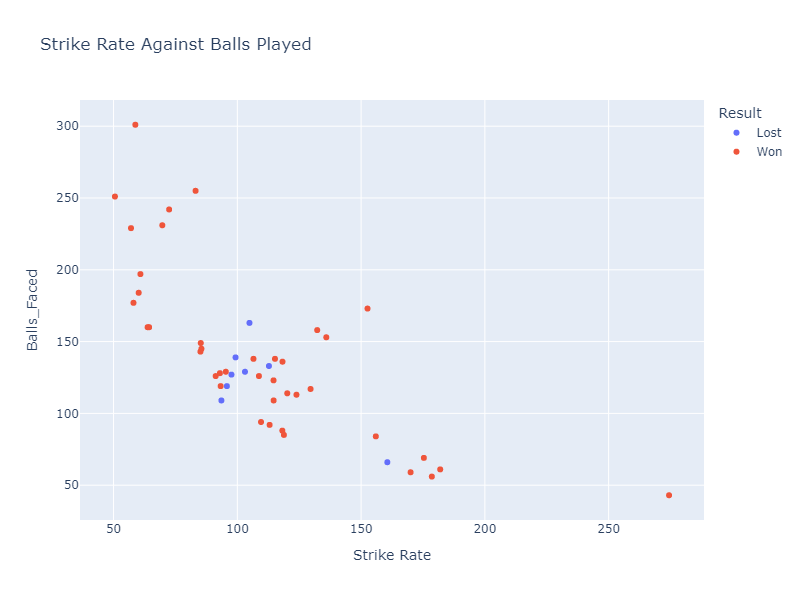

In [82]:
fig4 = px.scatter(df,x=df['Strike Rate'],y=df['Balls_Faced'] , color=df['Result'],width=800,height=600,title = 'Strike Rate Against Balls Played')
#fig.show()

#Save the figure as static image to be able to render in github code block
fig4.write_image("scatter_plot.png")

#Display the figure inline in the notebook as static image
Image("scatter_plot.png")

# MOTM Recieved

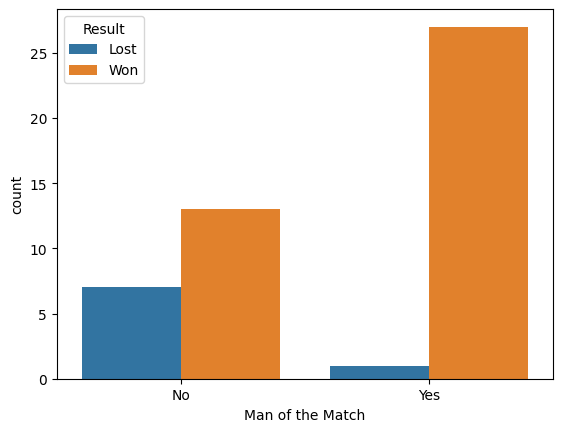

In [83]:
sns.countplot(df,x='Man of the Match',hue=df['Result'])
plt.show()

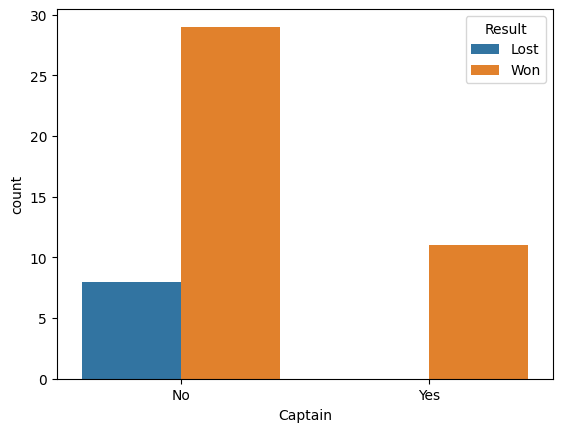

In [84]:
sns.countplot(df,x='Captain',hue=df['Result'])
plt.show()